**NAMA: IKA WIDA NURAGUSTIN**

**NIM: 2311110001**

**KELAS: S1SD-04-01**

**TUGAS 6 Praktikum IPSD:**

- Unduh data pada link dibawah!
https://drive.google.com/file/d/1HZ9YVBwhLdoxvJng4lRxEEOsWOQAEzB-/view?usp=sharing
- hapus kolom target
- Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data! Hasil dari EDA dan pre-processing dapat diinterpretasikan
- Lakukan pemodelan menggunakan algoritma k-means, buat penentuan nilai k dengan membuat diagram elbow, serta simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_K-Means”!
- Lakukan pemodelan menggunakan algoritma db-scan, simpan hasil label dari algoritma db-scan menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_DB-Scan”!
- Buat plot hasil permodelan menggunakan k-means dan db-scan! Interpretasikanlah hasil plot yang didapat!
- Menggunakan matriks evaluasi Silhouette score dan Davies-Bouldin Index, tentukan mana model dengan nilai evaluasi terbaik! Interpretaskanlah hasil matriks evaluasi yang didapat!

In [1]:
# Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Data

df = pd.read_csv('/content/Dataset-Tugas.csv')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**1. Hapus Kolom Target**

In [3]:
# Menghapus kolom target 'class'

data_cleaned = df.drop(columns=['class'])

# Menampilkan dataset tanpa kolom target

print("Dataset setelah kolom target 'class' dihapus:")
print(data_cleaned.head())

Dataset setelah kolom target 'class' dihapus:
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


INTERPRETASI:

Kode program diatas digunakan untuk menghapus kolom target yaitu kolom "class" sesuai dengan perintah yang telah diberikan. Kemudian menampilkan hasilnya yaitu dataset tanpa kolom class. Tujuan dari penghapusan kolom target "class" pada dataset adalah untuk memisahkan fitur-fitur (independent variables) dari kolom target (dependent variable).

**2. Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data! Hasil dari EDA dan pre-processing dapat diinterpretasikan**

In [4]:
# Mengetahui Info Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


INTERPRETASI:

Dari hasil diatas diketahui bahwa didalam dataset terdiri dari 150 baris dan 5 kolom, yang mana 4 kolom diantaranya memiliki tipe data numerik (float64): sepal length, sepal width, petal length, petal width. Sedangkan, satu kolom lainnya memiliki tipe data kategori atau teks (object): class. Didalam dataset ini tidak ada nilai yang kosong.


In [5]:
# Mengetahui Deskripsi dari data

df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


INTERPRETASI:

Dari hasil analisis deskriptif diatas diketahui bahwa dataset ini berisi  empat fitur numerik, yaitu sepal length, sepal width, petal length, dan petal width, yang diukur dari 150 sampel. Berdasarkan nilai rata-rata, panjang daun bunga (sepal length) memiliki nilai tertinggi sebesar 5.843, diikuti oleh panjang kelopak bunga (petal length) dengan rata-rata 3.759. Lebar daun bunga (sepal width) memiliki rata-rata 3.054, sementara rata-rata terendah terdapat pada lebar kelopak bunga (petal width), yaitu 1.199. Hal ini mengindikasikan bahwa daun bunga secara umum lebih panjang dan lebar dibandingkan kelopak bunga.

Variasi data di setiap fitur dapat dilihat dari standar deviasi (std), di mana petal length memiliki nilai standar deviasi tertinggi (1.764), menunjukkan sebaran data yang lebih luas, sementara sepal width memiliki standar deviasi terendah (0.434), mengindikasikan data yang lebih seragam.Rentang nilai data ditunjukkan oleh nilai minimum (min) dan maksimum (max). Sebagai contoh, panjang kelopak bunga (petal length) bervariasi dari 1.0 hingga 6.9, sedangkan lebar daun bunga (sepal width) berada dalam rentang yang lebih sempit, yaitu dari 2.0 hingga 4.4.

Dari nilai kuartil (25%, 50%, 75%) diketahui bahwa untuk sepal length, 25% data berada di bawah 5.1 cm, median di 5.8 cm, dan 75% data di bawah 6.4 cm. Pada sepal width, 25% data di bawah 2.8 cm, median di 3.0 cm, dan 75% di bawah 3.3 cm. Petal length memiliki 25% data di bawah 1.6 cm, median di 4.35 cm, dan 75% di bawah 5.1 cm. Sementara itu, untuk petal width, 25% data di bawah 0.3 cm, median di 1.3 cm, dan 75% di bawah 1.8 cm. Secara umum, data menunjukkan sebaran yang cukup merata pada sebagian besar fitur dengan rentang nilai yang jelas.

In [6]:
# Mengecek adanya duplikan dalam data

df.duplicated().sum()

3

INTERPRETASI:

Diketahui dari hasil diatas bahwa didalam dataset terdapat 3 nilai data yang duplikat atau memiliki nilai yang sama persis dengan nilai data lainnya dalam dataset.

In [7]:
# Menghapus duplikat dalam dataset

df_cleaned = df.drop_duplicates()

INTERPRETASI:

Kode program diatas digunakan untuk menghapus data duplikat yang ada di dalam dataset, yang sebelumnya telah diketahui bahwa terdapat 3 nilai data yang duplikat.

In [8]:
# Mengecek adanya missing value dalam data

df.isna().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


INTERPRETASI:

Diketahui bahwa dari hasil diatas, didalam dataset tidak terdapat missing value.

In [9]:
# Normalisasi kolom numerik

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cleaned)

# Konversi hasil normalisasi ke DataFrame

data_normalized_df = pd.DataFrame(data_normalized, columns=data_cleaned.columns)

print("\nData Setelah Normalisasi:")
print(data_normalized_df.head())


Data Setelah Normalisasi:
   sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


INTERPRETASI:

Kode program diatas digunakan untuk normalisasi data didalam dataset. Normalisasi dilakukan untuk mengubah skala nilai-nilai numerik pada setiap fitur sehingga berada dalam rentang yang lebih terstandarisasi, umumnya sekitar -1 hingga 1, untuk memudahkan perbandingan antar fitur. Data yang dinormalisasi ini nantinya akan digunakan untuk pemodelan DBSCAN.

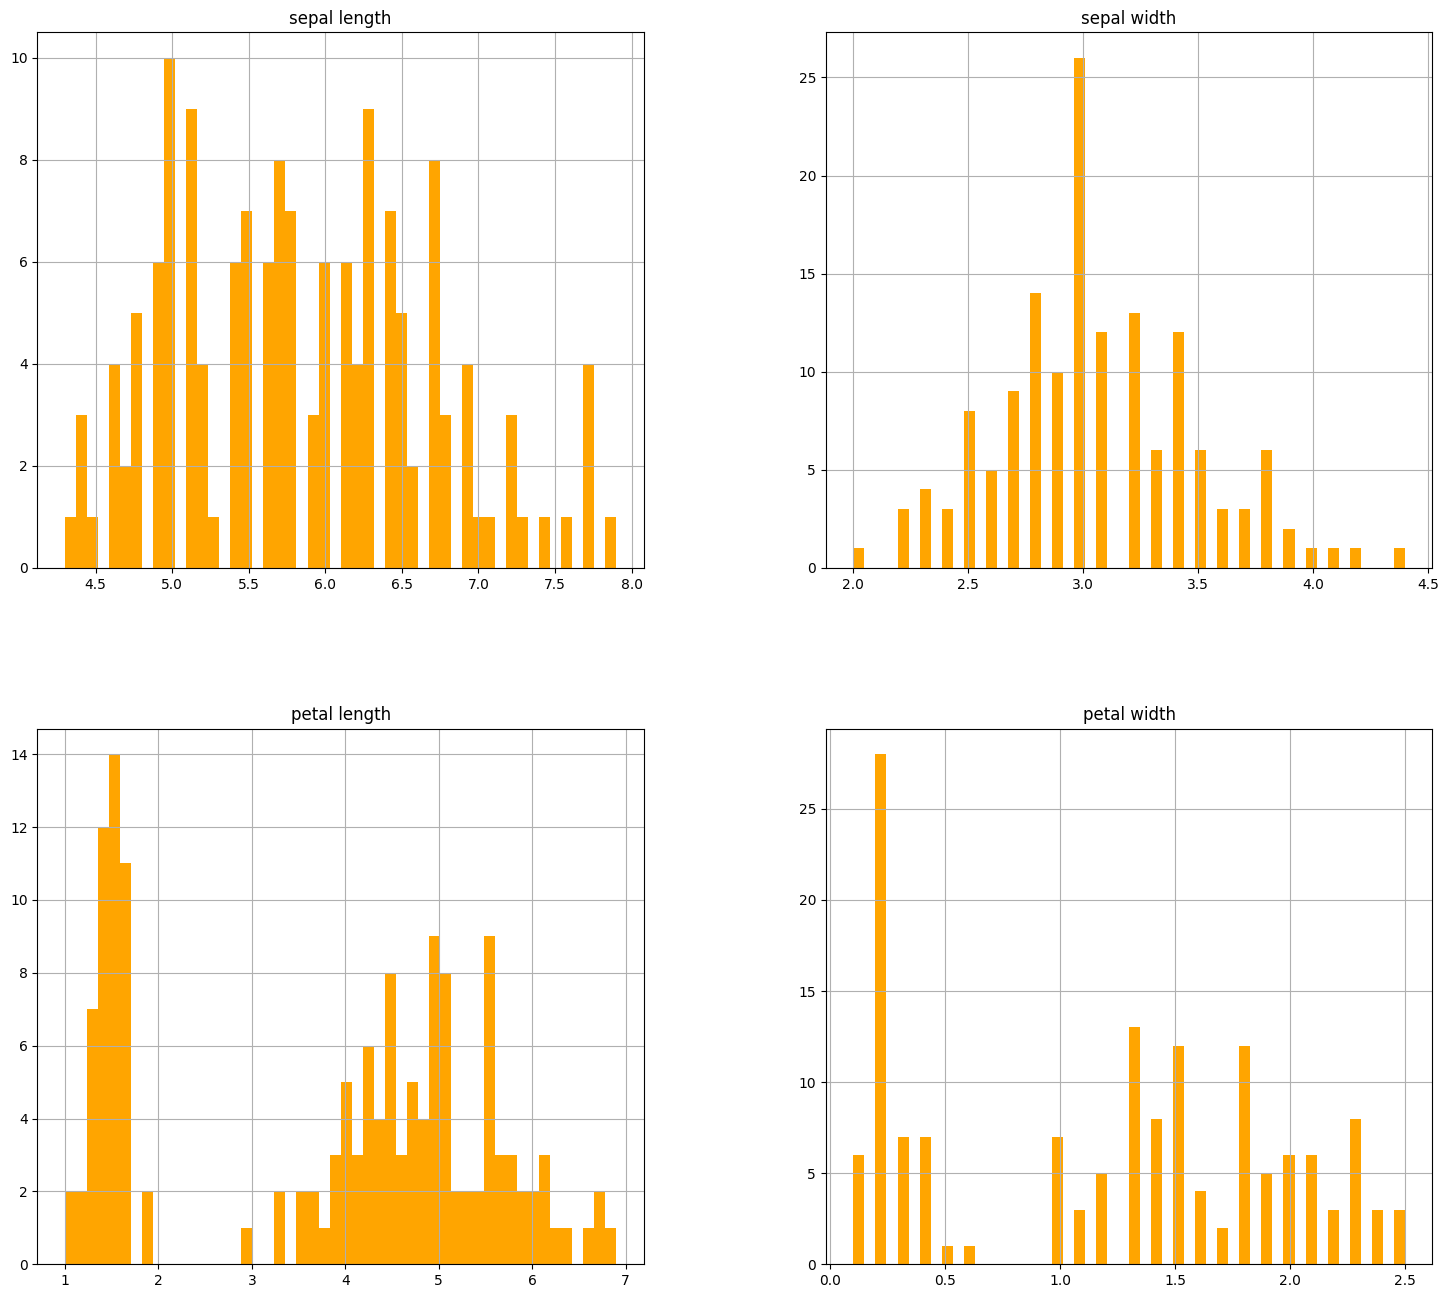

In [10]:
# Membuat visualisasi dari data

df.hist(bins=50, figsize=(18, 16), color='orange');

INTERPRETASI:

Kode program diatas digunakan untuk visualisasi data sebelum dilakukan pengecekan atau penghapusan outlier. Sebagai contoh yaitu hasil visualisasi dari variabel/fitur sepal length yang mana dari hasil visualisasi Memiliki distribusi yang lebar dan mencakup nilai-nilai ekstrem di kedua sisi. Panjang sepal berkisar dari 4.5 hingga sekitar 8, menunjukkan adanya data outlier pada kedua ujung distribusi. Beberapa bin di bagian tepi distribusi (sekitar 4.5 dan mendekati 8) memiliki nilai frekuensi kecil, yang sering kali disebabkan oleh outlier.


In [11]:
# Mengecek adanya outlier dalam data

def outlier(data):
  columns = df.select_dtypes(include=['int','float']).columns
  outlier_counts = {}
  for x in columns:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
    outlier_counts[x] = len(outliers)

  return outlier_counts

outlier_counts = outlier(df)
print(outlier_counts)

{'sepal length': 0, 'sepal width': 4, 'petal length': 0, 'petal width': 0}


INTERPRETASI:

Dari hasil diatas diketahui bahwa nilai outlier untuk variabel/fitur sepal length adalah 0, sepal width adalah 4, petal length adalah 0 dan petal width adalah 0. Data dalam dataset ini tidak begitu banyak memiliki outlier karena hanya terdapat 4 nilai outlier dalam dataset yaitu pada variabel/fitur sepal width.

In [12]:
# Membersihkan outlier dalam data

def remove_outlier(data):
  columns = df.select_dtypes(include=['int','float']).columns
  cleaned_data = data.copy()
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
  return cleaned_data

cleaned_data = remove_outlier(df)
print(cleaned_data)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[146 rows x 5 columns]


INTERPRETASI:

Kode program diatas digunakan untuk menghapus nilai outlier dalam dataset. Yang mana diketahui bahwa didalam dataset terdapat 4 nilai outlier.

In [13]:
# Mengecek info data setelah dibersihkan

df_cleaned = remove_outlier(df)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  146 non-null    float64
 1   sepal width   146 non-null    float64
 2   petal length  146 non-null    float64
 3   petal width   146 non-null    float64
 4   class         146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


INTERPRETASI:

Kode program diatas digunakan untuk mengecek info dataset setelah dilakukan penghapusan nilai outlier. Diketahui bahwa dari hasil diatas dataset sekarang hanya memiliki 146 baris yang mana awalnya memiliki 150 baris. Dataset sekarang memiliki jumlah yang lebih sedikit akan tetapi datanya lebih bersih, sehingga analisis atau pemodelan selanjutnya dapat lebih akurat dan tidak terpengaruh oleh nilai-nilai ekstrem yang dapat mendistorsi hasil.

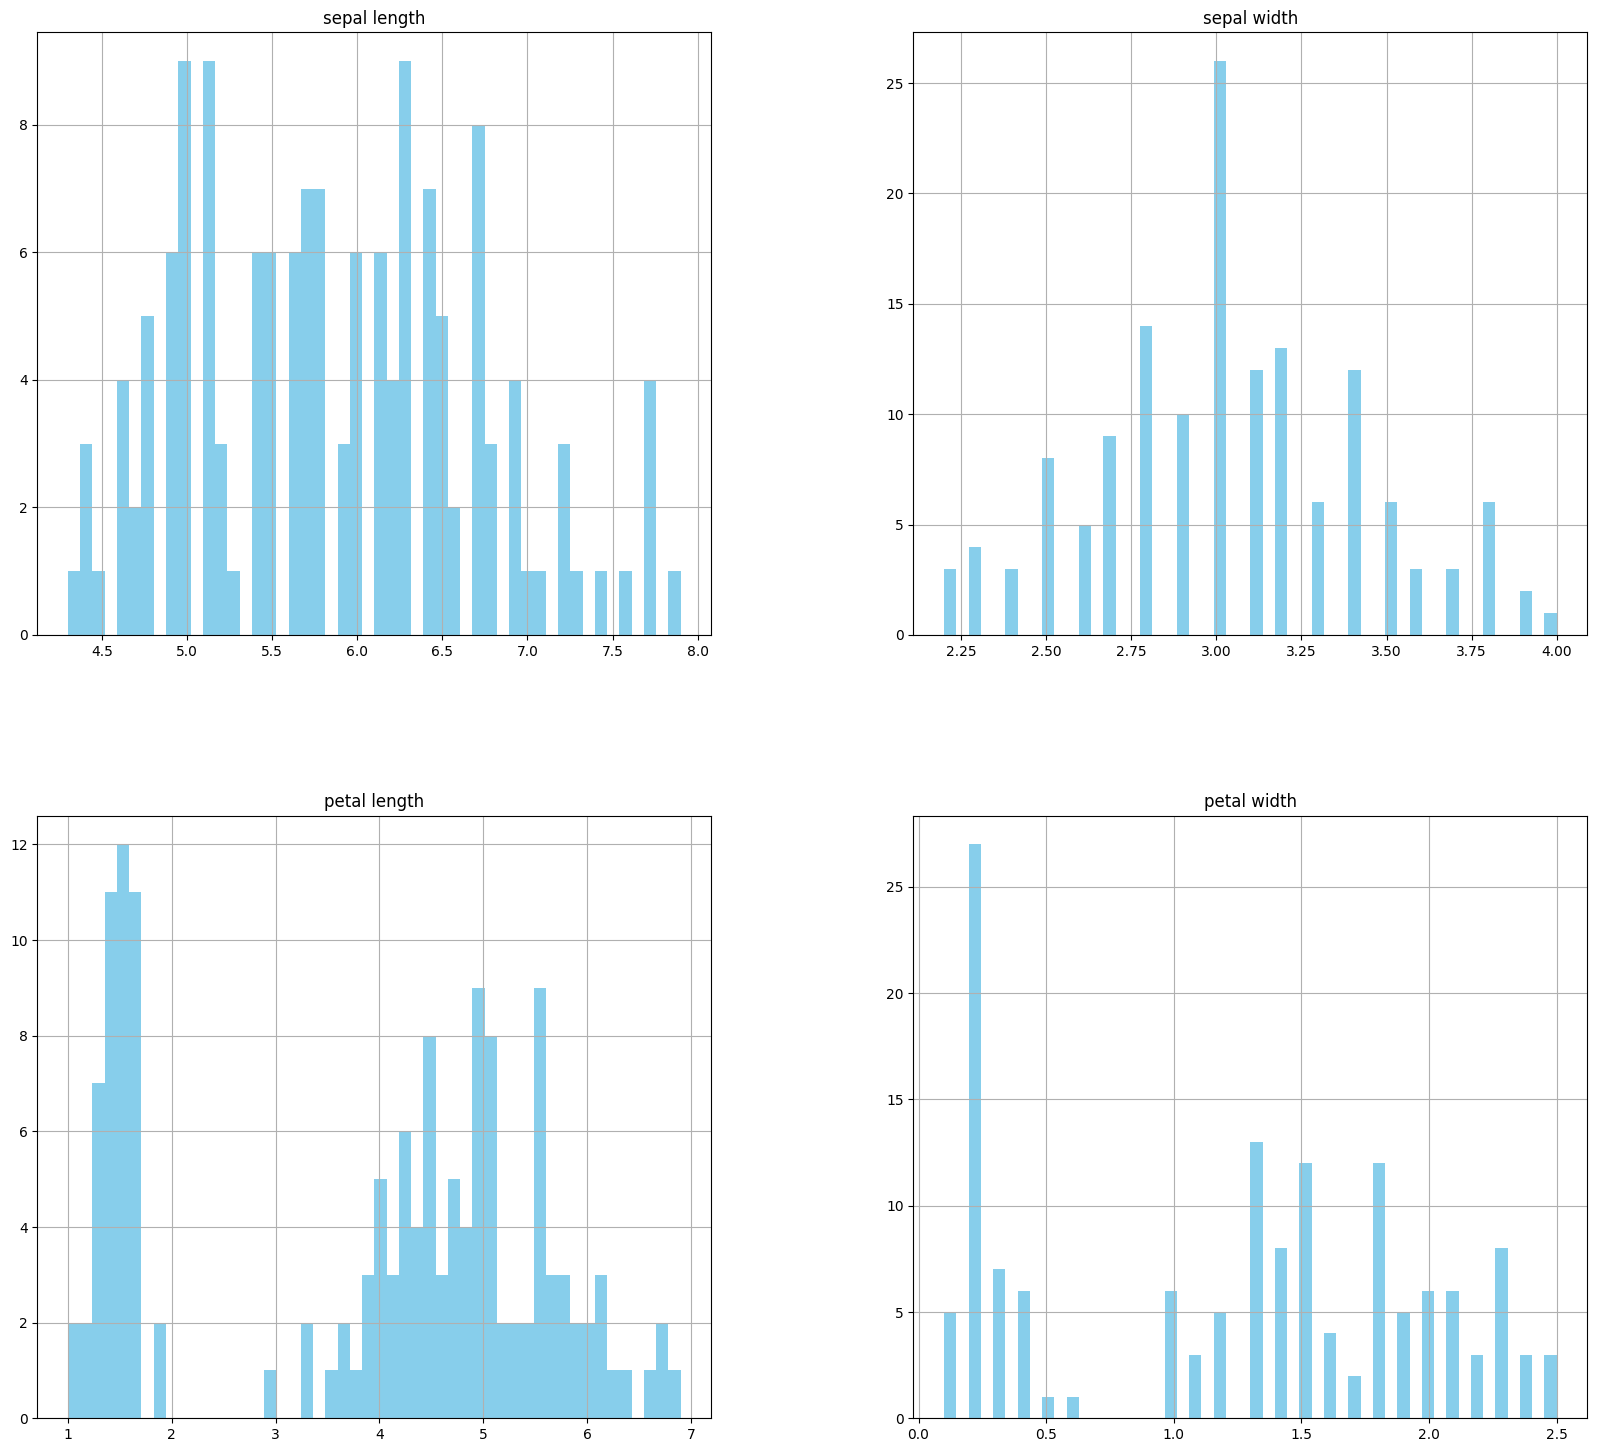

In [14]:
# Membuat Viualisasi data setelah dibersihkan outliernya

df_cleaned.hist(bins=50, figsize=(20, 18), color='skyblue');

INTERPRETASI:

Kode program diatas digunakan untuk membuat visualisasi dari dataset setelah dilakukan penghapusan nilai outlier. Dapat kita lihat bahwa hasil visualisasi tersebut sedikit berbeda dengan hasil visualisasi sebelumnya. Sebagai contoh yaitu bisa dilihat pada visulisasi variabel/fitur sepal length distribusi terlihat lebih terfokus pada nilai tengah dan tidak mencakup rentang nilai ekstrem seperti visualisasi sebelumnya. Rentang panjang sepal lebih sempit, dengan sebagian besar data berada antara sekitar 5 hingga 7. Frekuensi nilai di bin bagian tepi yang sebelumnya rendah sekarang menghilang, mencerminkan penghapusan data ekstrem.

Penghapusan outlier telah mengurangi rentang data sehingga distribusi lebih terpusat, meningkatkan representasi data utama.
Setelah penghapusan outlier, distribusi data menjadi lebih bersih, lebih normal, dan lebih representatif terhadap populasi inti, sementara sebelum penghapusan outlier, distribusi terlihat lebih tersebar dan terpengaruh oleh nilai ekstrem.

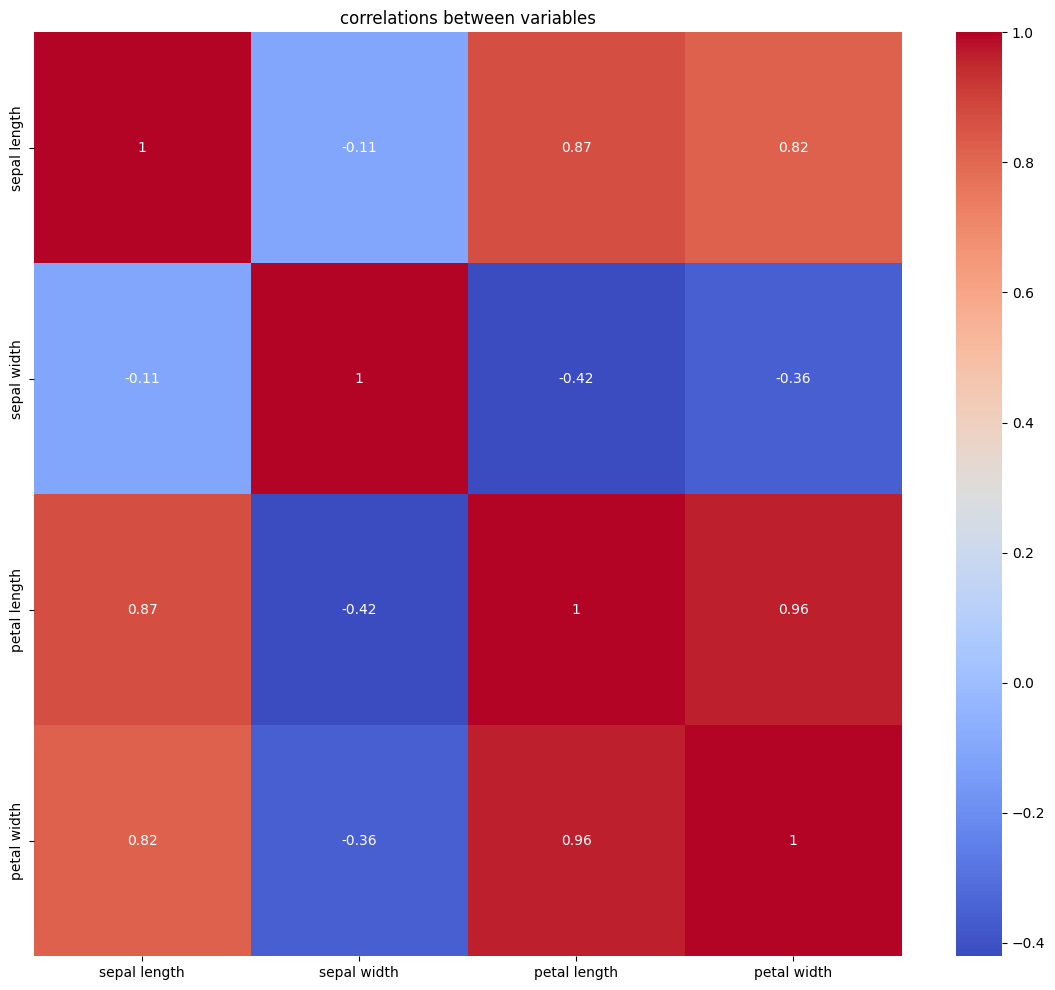

In [15]:
# Mengecek hubungan setiap variabel dalam data

df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 12))
plt.title('correlations between variables')
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

INTERPRETASI:

Kode program diatas digunakan untuk mengetahui kekuatan hubungan antar variabel/fitur. Diketahui bahwa dari hasil heatmap korelasi tersebut variabel-variabel seperti "petal length" dan "petal width" memiliki hubungan yang sangat erat, sehingga mereka bisa saling merepresentasikan dalam analisis lebih lanjut.
"Sepal width" memiliki hubungan negatif dengan sebagian besar variabel lainnya, namun kekuatannya lemah hingga sedang. Secara rinci hubungan antar variabel didalam dataset tersebut adalah sebagai berikut:
- Diagonal Utama (Korelasi = 1):

  Diagonal utama memiliki nilai 1, yang menunjukkan bahwa setiap variabel memiliki korelasi sempurna dengan dirinya sendiri (seperti "sepal length" dengan "sepal length").
- Korelasi Positif Tinggi:

  1. "Sepal length" dengan "petal length" (0.87): Menunjukkan hubungan positif yang sangat kuat; semakin panjang sepal, biasanya petal juga semakin panjang.
  2. "Sepal length" dengan "petal width" (0.82): Hubungan positif kuat; panjang sepal cenderung bertambah seiring dengan lebar petal.
  3. "Petal length" dengan "petal width" (0.96): Hubungan yang sangat kuat; panjang petal sangat berkaitan erat dengan lebarnya.
- Korelasi Negatif Sedang hingga Lemah:
  1. "Sepal width" dengan "petal length" (-0.42): Hubungan negatif sedang; semakin lebar sepal, biasanya panjang petal cenderung lebih pendek.
  2. "Sepal width" dengan "petal width" (-0.36): Hubungan negatif lemah; lebar sepal sedikit cenderung menurun ketika lebar petal bertambah.
  3. "Sepal width" dengan "sepal length" (-0.11): Hubungan negatif yang sangat lemah, sehingga hampir tidak ada hubungan antara lebar dan panjang sepal.
- Korelasi Lemah atau Tidak Signifikan:
  1. "Sepal width" dengan "sepal length" (-0.11): Korelasi mendekati nol, sehingga panjang dan lebar sepal hampir tidak saling berpengaruh.

**3. Lakukan pemodelan menggunakan algoritma k-means, buat penentuan nilai k dengan membuat diagram elbow, serta simpan hasil label dari algoritma k-means menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_K-Means”!**

In [16]:
# Import Library

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

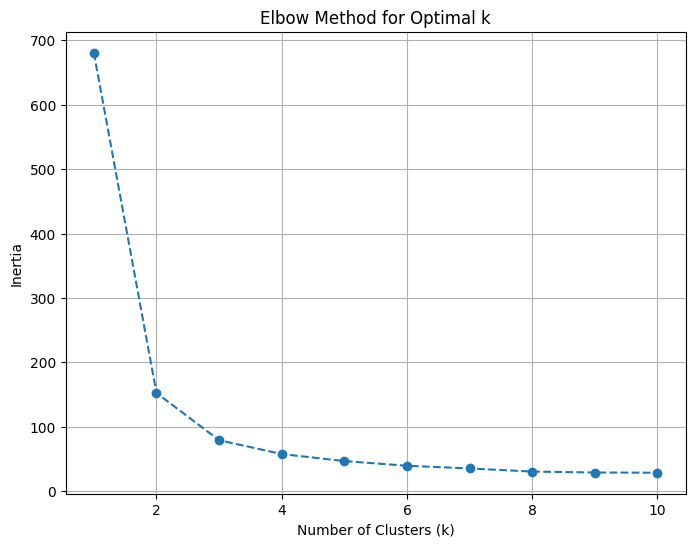

In [17]:
# Menentukan data yang akan digunakan untuk clustering (tanpa kolom 'class')

features = data_cleaned.values

# Menentukan inertia untuk berbagai nilai k

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Membuat diagram elbow

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

In [18]:
# Mentukan nilai k berdasarkan hasil elbow

optimal_k = 3

# Melakukan clustering dengan K-Means

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(features)

# Menambahkan hasil label ke dataset sebagai kolom baru

data_cleaned['Label_K-Means'] = labels

# Menampilkan 5 baris pertama dataset dengan label

print("Dataset dengan Label K-Means:")
print(data_cleaned.head())

Dataset dengan Label K-Means:
   sepal length  sepal width  petal length  petal width  Label_K-Means
0           5.1          3.5           1.4          0.2              1
1           4.9          3.0           1.4          0.2              1
2           4.7          3.2           1.3          0.2              1
3           4.6          3.1           1.5          0.2              1
4           5.0          3.6           1.4          0.2              1


INTERPRETASI:

Hasil diatas menunjukkan bahwa didalam dataset telah terbentuk fitur/kolom baru yaitu "Label_K-Means" sesuai dengan yang diperintahkan dalam soal. Dengan menggunakan nilai k adalah 3, yang mana nilai ini diambil dari diagram elbow yang mana nilai k optimal dapat ditentukan dari titik di mana penurunan inersia mulai melambat secara signifikan, membentuk "sudut siku". Dari grafik dapat dilihat Penurunan inersia yang besar terlihat dari 𝑘 = 1 ke 𝑘 = 3. Setelah 𝑘 = 3, penurunan inersia menjadi lebih kecil (melambat).

**4. Lakukan pemodelan menggunakan algoritma db-scan, simpan hasil label dari algoritma db-scan menjadi kolom baru di data tersebut, buat nama kolom menjadi “Label_DB-Scan”!**

In [19]:
# Import Library

from sklearn.cluster import DBSCAN
import pandas as pd

In [20]:
# Menerapkan DBSCAN pada data yang sudah dinormalisasi

dbscan = DBSCAN(eps=0.5, min_samples=5)
data_cleaned['Label_DB-Scan'] = dbscan.fit_predict(data_normalized)

# Menampilkan dataset dengan kolom Label_DB-Scan

print(data_cleaned.head())

   sepal length  sepal width  petal length  petal width  Label_K-Means  \
0           5.1          3.5           1.4          0.2              1   
1           4.9          3.0           1.4          0.2              1   
2           4.7          3.2           1.3          0.2              1   
3           4.6          3.1           1.5          0.2              1   
4           5.0          3.6           1.4          0.2              1   

   Label_DB-Scan  
0              0  
1              0  
2              0  
3              0  
4              0  


INTERPRETASI:

Hasil diatas menunjukkan bahwa didalam datset telah terbentuk fitur/kolom baru yaitu “Label_DB-Scan” sesuai dengan yang diperintahkan didalam soal. Pemodelan DBSCAN ini menggunakan data yang telah dinormalisasi sebelumnya. Karena DBSCAN bekerja berdasarkan jarak antar titik data. Oleh karena itu, penting untuk menormalisasi data sebelum menggunakan algoritma ini.

**5. Buat plot hasil permodelan menggunakan k-means dan db-scan! Interpretasikanlah hasil plot yang didapat!**

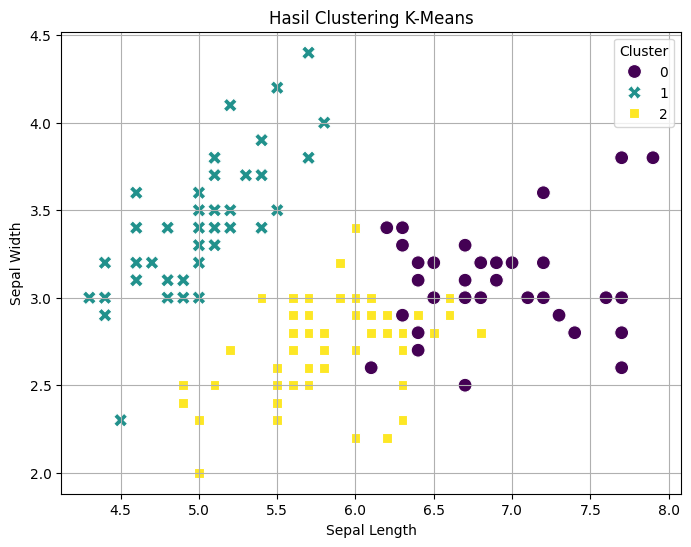

In [21]:
# Plot hasil K-Means

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='sepal length', y='sepal width', hue='Label_K-Means', palette='viridis', style='Label_K-Means', s=100)
plt.title('Hasil Clustering K-Means')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

INTERPRETASI:

Kode program diatas digunakan untuk membuat visualisasi hasil pemodelan K-Means dengan menggunakan variabel Sepal Length dan Sepal Width. Dari hasil visualisasi diatas dapat dilihat bahwa terdapat 3 pembagian klaster tanpa mendeteksi outlier dengan rincian sebagai berikut:

1. Klaster 0

  Ditandai dengan lingkaran ungu, klaster ini mendominasi bagian kanan grafik. Titik-titik dalam klaster ini memiliki panjang sepal antara 6.0 hingga 7.5 dan lebar sepal antara 2.5 hingga 3.3. Klaster ini menggambarkan spesies bunga Iris dengan ciri sepal yang relatif panjang dan lebar sedang.

2. Klaster 1

  Ditandai dengan tanda silang biru, klaster ini berada di bagian kiri atas grafik. Titik-titik dalam klaster ini memiliki panjang sepal antara 4.5 hingga 5.8 dan lebar sepal antara 3.0 hingga 4.0. Klaster ini merepresentasikan spesies bunga Iris dengan sepal yang lebih pendek tetapi lebih lebar.

3. Klaster 2

  Ditandai dengan kotak kuning, klaster ini terletak di bagian tengah grafik. Titik-titik dalam klaster ini memiliki panjang sepal antara 5.5 hingga 6.5 dan lebar sepal antara 2.0 hingga 3.0. Klaster ini menunjukkan spesies bunga Iris dengan ukuran sepal yang sedang, baik panjang maupun lebarnya.

K-Means membagi data secara merata ke dalam tiga klaster dengan memastikan bahwa setiap titik memiliki jarak minimum terhadap centroid klaster masing-masing.


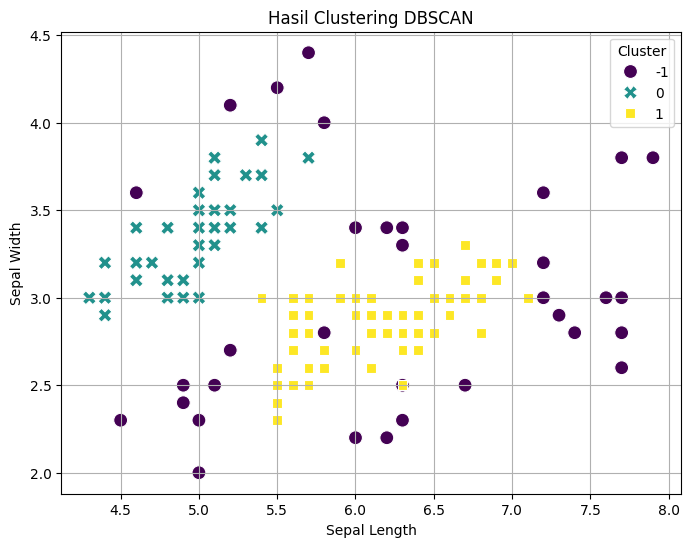

In [22]:
# Plot hasil DBSCAN

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_cleaned, x='sepal length', y='sepal width', hue='Label_DB-Scan', palette='viridis', style='Label_DB-Scan', s=100)
plt.title('Hasil Clustering DBSCAN')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

INTERPRETASI:

Kode program diatas digunakan untuk membuat visualisasi hasil pemodelan DBSCAN dengan menggunakan variabel Sepal Length dan Sepal Width. Dari hasil visualisasi diatas dapat dilihat bahwa terdapat tiga pembagian klaster dimana terdiri dari dua klaster utama dan satu klaster yang dianggap outlier (noise) dengan rincian sebagai berikut:

1. Klaster 0

  Ditandai dengan tanda silang biru, klaster ini berada di sisi kiri atas grafik. Data dalam klaster ini memiliki panjang sepal antara 4.5 hingga 5.8 dan lebar sepal antara 2.8 hingga 4.0. Klaster ini mewakili kelompok bunga Iris dengan sepal yang lebih pendek namun lebih lebar.

2. Klaster 1

  Ditandai dengan kotak kuning, klaster ini terletak di bagian tengah hingga kanan bawah grafik. Data dalam klaster ini memiliki panjang sepal antara 5.5 hingga 7.0 dan lebar sepal antara 2.5 hingga 3.3. Klaster ini menunjukkan kelompok bunga Iris dengan sepal yang lebih panjang namun lebih sempit.

3. Klaster -1 (Outlier)

  Ditandai dengan lingkaran ungu, titik-titik ini tersebar di berbagai lokasi, seperti di bagian kanan atas dan bawah tengah grafik. Titik-titik ini dianggap sebagai outlier karena tidak sesuai dengan pola kelompok utama. Data tersebut kemungkinan mewakili bunga Iris dengan karakteristik yang berbeda secara signifikan dibandingkan kelompok lainnya.

Metode DBSCAN menggunakan kepadatan data untuk menentukan kelompok, sehingga dapat mengidentifikasi dan memisahkan titik-titik yang tidak memenuhi kriteria untuk masuk ke dalam klaster utama, menjadikannya metode yang efektif dalam mendeteksi outlier.

**6. Menggunakan matriks evaluasi Silhouette score dan Davies-Bouldin Index, tentukan mana model dengan nilai evaluasi terbaik! Interpretaskanlah hasil matriks evaluasi yang didapat!**

In [23]:
# Import Library

from sklearn.metrics import silhouette_score, davies_bouldin_score

In [24]:
# Menghitung Silhouette Score dan Davies-Bouldin Index untuk K-Means

silhouette_kmeans = silhouette_score(data_normalized, data_cleaned['Label_K-Means'])
db_index_kmeans = davies_bouldin_score(data_normalized, data_cleaned['Label_K-Means'])

In [25]:
# Menghitung Silhouette Score dan Davies-Bouldin Index untuk DBSCAN

silhouette_dbscan = silhouette_score(data_normalized, data_cleaned['Label_DB-Scan'])
db_index_dbscan = davies_bouldin_score(data_normalized, data_cleaned['Label_DB-Scan'])

In [26]:
# Menampilkan hasil evaluasi

print("K-Means: Silhouette Score =", silhouette_kmeans, ", Davies-Bouldin Index =", db_index_kmeans)
print("DBSCAN: Silhouette Score =", silhouette_dbscan, ", Davies-Bouldin Index =", db_index_dbscan)

K-Means: Silhouette Score = 0.44597964583308475 , Davies-Bouldin Index = 0.8656776696271548
DBSCAN: Silhouette Score = 0.3491981656526392 , Davies-Bouldin Index = 6.16079827018773


INTERPRETASI:

Dari hasil matriks evaluasi diatas dapat dilihat bahwa model K-Means menunjukkan kinerja yang lebih baik dibandingkan dengan DBSCAN. Hal ini terlihat dari Silhouette Score K-Means yang lebih tinggi (0.44597964583308475), mengindikasikan klaster yang cukup baik dengan pemisahan yang cukup jelas antara titik data dalam klaster dan klaster lain. Selain itu, Davies-Bouldin Index (DBI) K-Means yang lebih rendah (0.8656776696271548) menunjukkan klaster yang lebih terpisah dan padat secara internal.

Sebaliknya, model DBSCAN memiliki performa yang lebih rendah. Silhouette Score DBSCAN yang lebih rendah (0.3491981656526392 ) menunjukkan bahwa banyak titik berada di area perbatasan antar-klaster, dan Davies-Bouldin Index (DBI) yang sangat tinggi (6.16079827018773) mengindikasikan klaster yang tumpang tindih atau tidak terdefinisi dengan baik. Hal ini mungkin disebabkan oleh parameter DBSCAN yang kurang optimal atau distribusi data yang kurang mendukung algoritma berbasis kepadatan.

Jadi, dapat disimpulkan bahwa model dengan nilai evaluasi terbaik berdasarkan kedua metrik evaluasi adalah MODEL K-MEANS. Model K-Means lebih efektif untuk data ini karena klaster yang terbentuk lebih terdefinisi dengan baik dibandingkan DBSCAN.

